In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Exp-2.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company Name  250 non-null    object
 1   Review        250 non-null    object
dtypes: object(2)
memory usage: 4.0+ KB


In [4]:
data.head()

,Company Name,Review
0,Apple,nice product
1,Apple,Great product.
2,Apple,All amazing and as expected. The colour looks ...
3,Apple,Nothing more can be said about the device exce...
4,Apple,Excellent product to buy during discount offers


In [9]:
# Remove Extra Space, Speacial Symbol and Character.

In [11]:
import re
# Define a function to clean the text
def clean(text):
    # Statement for clean the data
    text = re.sub('[^A-Za-z]+', ' ', text) 
    return text

# Cleaning the text in the review column
data['Cleaned Reviews'] = data['Review'].apply(clean)
data.head()

,Company Name,Review,Cleaned Reviews
0,Apple,nice product,nice product
1,Apple,Great product.,Great product
2,Apple,All amazing and as expected. The colour looks ...,All amazing and as expected The colour looks b...
3,Apple,Nothing more can be said about the device exce...,Nothing more can be said about the device exce...
4,Apple,Excellent product to buy during discount offers,Excellent product to buy during discount offers


In [12]:
### Remove Stop Word and POS tagging

In [13]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

data['POS tagged'] = data['Cleaned Reviews'].apply(token_stop_pos)
data.head()

[nltk_data] Downloading package punkt to C:\Users\Mohammad
[nltk_data]     Mohsin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Mohammad
[nltk_data]     Mohsin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Mohammad
[nltk_data]     Mohsin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Company Name,Review,Cleaned Reviews,POS tagged
0,Apple,nice product,nice product,"[(nice, a), (product, n)]"
1,Apple,Great product.,Great product,"[(Great, n), (product, n)]"
2,Apple,All amazing and as expected. The colour looks ...,All amazing and as expected The colour looks b...,"[(amazing, a), (expected, v), (colour, n), (lo..."
3,Apple,Nothing more can be said about the device exce...,Nothing more can be said about the device exce...,"[(Nothing, v), (said, v), (device, n), (except..."
4,Apple,Excellent product to buy during discount offers,Excellent product to buy during discount offers,"[(Excellent, a), (product, n), (buy, v), (disc..."


In [14]:
### Lemmatization 

In [15]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
    
data['Lemma'] = data['POS tagged'].apply(lemmatize)
data.head()

,Company Name,Review,Cleaned Reviews,POS tagged,Lemma
0,Apple,nice product,nice product,"[(nice, a), (product, n)]",nice product
1,Apple,Great product.,Great product,"[(Great, n), (product, n)]",Great product
2,Apple,All amazing and as expected. The colour looks ...,All amazing and as expected The colour looks b...,"[(amazing, a), (expected, v), (colour, n), (lo...",amazing expect colour look good pic reality ...
3,Apple,Nothing more can be said about the device exce...,Nothing more can be said about the device exce...,"[(Nothing, v), (said, v), (device, n), (except...",Nothing say device except work expect price pay
4,Apple,Excellent product to buy during discount offers,Excellent product to buy during discount offers,"[(Excellent, a), (product, n), (buy, v), (disc...",Excellent product buy discount offer


In [16]:
data[['Review', 'Lemma']]

,Review,Lemma
0,nice product,nice product
1,Great product.,Great product
2,All amazing and as expected. The colour looks ...,amazing expect colour look good pic reality ...
3,Nothing more can be said about the device exce...,Nothing say device except work expect price pay
4,Excellent product to buy during discount offers,Excellent product buy discount offer
...,...,...
245,The design looks premium and modern.,design look premium modern
246,Water resistance would have been great.,Water resistance would great
247,Camera software improvements needed.,Camera software improvement need
248,One of the best Realme phones ever!,One best Realme phone ever


In [17]:
### Analyze the sentiment using Vader.

In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment  
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

data['Vader Sentiment'] = data['Lemma'].apply(vadersentimentanalysis)
data.head()

,Company Name,Review,Cleaned Reviews,POS tagged,Lemma,Vader Sentiment
0,Apple,nice product,nice product,"[(nice, a), (product, n)]",nice product,0.4215
1,Apple,Great product.,Great product,"[(Great, n), (product, n)]",Great product,0.6249
2,Apple,All amazing and as expected. The colour looks ...,All amazing and as expected The colour looks b...,"[(amazing, a), (expected, v), (colour, n), (lo...",amazing expect colour look good pic reality ...,0.7717
3,Apple,Nothing more can be said about the device exce...,Nothing more can be said about the device exce...,"[(Nothing, v), (said, v), (device, n), (except...",Nothing say device except work expect price pay,-0.1027
4,Apple,Excellent product to buy during discount offers,Excellent product to buy during discount offers,"[(Excellent, a), (product, n), (buy, v), (disc...",Excellent product buy discount offer,0.5719


In [19]:
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
    
data['Vader Analysis'] = data['Vader Sentiment'].apply(vader_analysis)
data.head()

,Company Name,Review,Cleaned Reviews,POS tagged,Lemma,Vader Sentiment,Vader Analysis
0,Apple,nice product,nice product,"[(nice, a), (product, n)]",nice product,0.4215,Neutral
1,Apple,Great product.,Great product,"[(Great, n), (product, n)]",Great product,0.6249,Positive
2,Apple,All amazing and as expected. The colour looks ...,All amazing and as expected The colour looks b...,"[(amazing, a), (expected, v), (colour, n), (lo...",amazing expect colour look good pic reality ...,0.7717,Positive
3,Apple,Nothing more can be said about the device exce...,Nothing more can be said about the device exce...,"[(Nothing, v), (said, v), (device, n), (except...",Nothing say device except work expect price pay,-0.1027,Neutral
4,Apple,Excellent product to buy during discount offers,Excellent product to buy during discount offers,"[(Excellent, a), (product, n), (buy, v), (disc...",Excellent product buy discount offer,0.5719,Positive


In [20]:
vader_counts = data['Vader Analysis'].value_counts()
vader_counts

Positive    129
Neutral     117
Negative      4
Name: Vader Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x1ba1425d950>,
 [Text(-0.06029307948001826, 1.198484353075507, 'Positive'),
  Text(-2.0597886563278817e-07, -1.0999999999999808, 'Neutral'),
  Text(1.098610641138547, -0.05526897119678317, 'Negative')],
 [Text(-0.035170963030010646, 0.6991158726273791, '51.6%'),
  Text(-1.1235210852697535e-07, -0.5999999999999894, '46.8%'),
  Text(0.5992421678937528, -0.03014671156188173, '1.6%')])

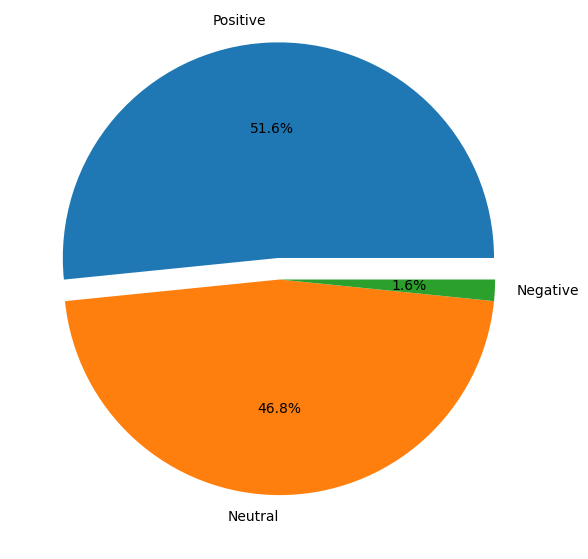

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
vader_counts= data['Vader Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)
# plt.legend()

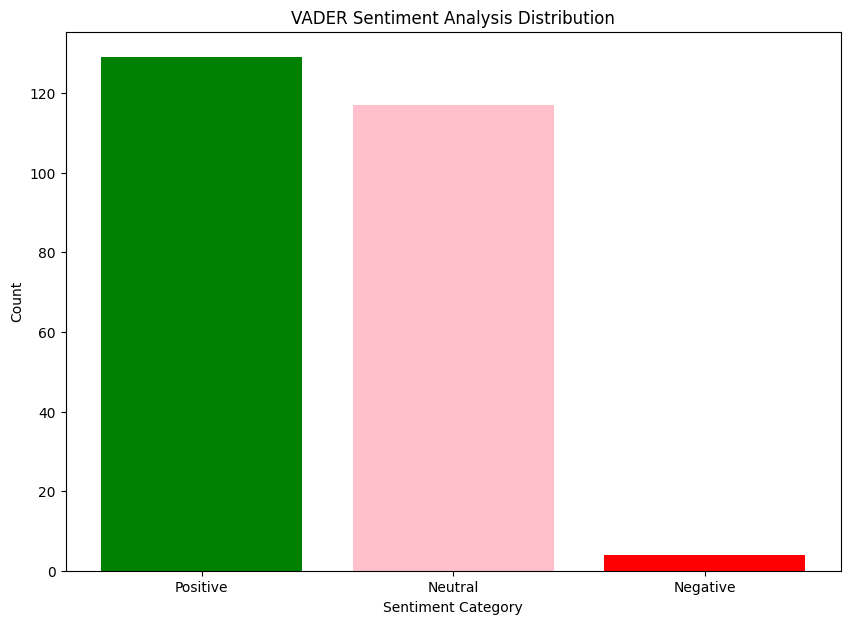

In [25]:
import matplotlib.pyplot as plt

# Count occurrences of each sentiment category
vader_counts = data['Vader Analysis'].value_counts()

# Create figure
plt.figure(figsize=(10, 7))

# Bar plot
plt.bar(vader_counts.index, vader_counts.values, color=['green', 'pink', 'red'])

# Labels and title
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('VADER Sentiment Analysis Distribution')

# Show plot
plt.show()